In [1]:
import numpy as np
import gvar as gv
import lsqfit
import sys
import os
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import h5py
import time
from collections import OrderedDict

sys.path.append("../")
from fitter import data_loader as dl
from fitter import bootstrapper as bs
from fitter import fitter as fit
from fitter import special_functions as sf

for j in range(10): # Sometimes this needs to be loaded twice...
    matplotlib.rcParams['figure.figsize'] = [10, 10]

In [93]:
reload(bs)
reload(dl)
reload(fit)
reload(sf)

<module 'fitter.special_functions' from '../fitter\special_functions.pyc'>

### w/e

In [94]:
p_dict = {
    'order' : {
        'fit' : 'nlo',
        'vol' : 0 # max 10
    }, 
    'bs_N' : 1,  # if 0, use full list
    'F2' : 'FKFpi', #'FKfpi', 'FpiFpi', 'FKFK'

    'use_prior' : False,


    'make_plots' : True,
    'show_error_ellipses' : False,
    'show_bs_histograms' : False,

    'save_prior' : False,
    'save_results' : True,
}

In [103]:
abbrs =   [u'a09m220', u'a09m310', u'a09m350', u'a09m400', u'a12m130',
           u'a12m220',  u'a12m220S', u'a12m220L', u'a12m310', u'a12m350',
           u'a12m400', u'a15m130', u'a15m220', u'a15m310', u'a15m350', u'a15m400']

abbrs = ['a15m310']

L5_by_ensemble = {'nm' : {}}

for fit_type in ['ma-taylor']:#['xpt-taylor', 'ma-taylor']:
    p_dict['fit_type'] = fit_type
    L5_by_ensemble['nm'][fit_type] = {}
    for abbr in abbrs:
        p_dict['abbrs'] = [abbr]
        print fit_type, abbr
        
        # Do fit
        t0 = time.time()

        # Load data
        data_loader = dl.data_loader()
        fit_data = data_loader.get_fit_data()

        # Get prior
        prior = None
        if p_dict['use_prior']:
            prior = data_loader.get_prior(p_dict['fit_type'])

        # Make bootstrapper
        bootstrapper = bs.bootstrapper(fit_data, prior=prior, order=p_dict['order'], F2=p_dict['F2'],
                                       fit_type=p_dict['fit_type'], bs_N=p_dict['bs_N'], abbrs=p_dict['abbrs'])
        t1 = time.time()
        
        L5_by_ensemble['nm'][fit_type][abbr] = gv.gvar(bootstrapper.get_fit_parameters('L_5'))

        print "\nTotal time (s): ", t1 - t0, "\n"

ma-taylor a15m310
Using default prior.
Making fits...
100% complete Time (s):  0.0320000648499
Compiling results...

Total time (s):  0.118000030518 



In [101]:
def test(self):
    fit_data = {
        'mpi' : [0.2360861817559181],
        'mk' : [0.4046019504021037],
        'mss' : [0.5187527801912314],
        'mju' : [0.3061540585217501], 
        'mjs' : [0.4346334326859672],
        'mru' : [0.4507718960348012],
        'mrs' : [0.5489533322568679],
        'aw0' : [0.8804],
        'a2DI' : [1],
        'lam2_chi' : [0.9859804526801081],
        'L' : [0.1]
    }
    for key in fit_data.keys():
        fit_data[key] = np.array(fit_data[key])
    
    fit_parameters = {'L_5' : 0.00}
    
    return self.fk_fpi_fit_fcn(fit_data=fit_data, fit_parameters=fit_parameters)



In [102]:
print "ma-old"
test(bootstrapper)

ma-old


array([ 1.10621449])

In [104]:
print "ma-taylor"
test(bootstrapper)

ma-taylor


array([ 1.10175462])

In [162]:
mpi = 0.1 
mss = 0.2
mx = 0.3
mu = 1
sf.fcn_K_m1m2m3((mpi, mss, mx), 0, mu, 0)

0.078965319007776036

In [161]:
mpi = 0.1 
mss = 0.2
mx = 0.3
mu = 1

def test((m1, m2, m3), L, mu, order):
    output = (
        1.0/((m1**2 - m2**2) *(m1**2 - m3**2)) *np.log((m1/mu)**2) *(m1 /( 4 *np.pi))**2
        + 1.0/((m2**2 - m1**2) *(m2**2 - m3**2)) *np.log((m2/mu)**2) *(m2 /( 4 *np.pi))**2
        + 1.0/((m3**2 - m1**2) *(m3**2 - m2**2)) *np.log((m3/mu)**2) *(m3 /( 4 *np.pi))**2
    )
    return output

test((mpi, mss, mx), 0, mu, 0)

0.078965319007776147

In [159]:
-1918.8209108283713 + 2145.9172165788004 + -601.9864021629683

-374.89009641253915

In [79]:
# Andre's results
L5_by_ensemble['aw'] = {
  'ma-taylor': {
    u'a09m220': '0.000263(22)',
    u'a09m310': '0.000334(24)',
    u'a09m350': '0.000382(41)',
    u'a09m400': '0.000392(19)',
    u'a12m130': '0.000323(43)',
    u'a12m220': '0.000290(29)',
    u'a12m220L': '0.000245(36)',
    u'a12m220S': '0.000389(34)',
    u'a12m310': '0.000349(33)',
    u'a12m350': '0.000317(48)',
    u'a12m400': '0.000380(35)',
    u'a15m130': '0.000599(54)',
    u'a15m220': '0.000347(24)',
    u'a15m310': '0.000441(21)',
    u'a15m350': '0.000448(28)',
    u'a15m400': '0.000429(28)'},

  'xpt-taylor': {
    u'a09m220': '0.000173(21)',
    u'a09m310': '0.000256(23)',
    u'a09m350': '0.000315(16)',
    u'a09m400': '0.000334(18)',
    u'a12m130': '-0.000011(41)',
    u'a12m220': '0.000039(27)',
    u'a12m220L': '-8(35)e-06',
    u'a12m220S': '0.000144(33)',
    u'a12m310': '0.000150(32)',
    u'a12m350': '0.000146(45)',
    u'a12m400': '0.000199(32)',
    u'a15m130': '0.000139(46)',
    u'a15m220': '-0.000042(19)',
    u'a15m310': '0.000105(18)',
    u'a15m350': '0.000126(14)',
    u'a15m400': '0.000135(16)'}
}
L5_by_ensemble['aw']['ma-taylor'] = gv.gvar(L5_by_ensemble['aw']['ma-taylor'])
L5_by_ensemble['aw']['xpt-taylor'] = gv.gvar(L5_by_ensemble['aw']['xpt-taylor'])

### Make graph

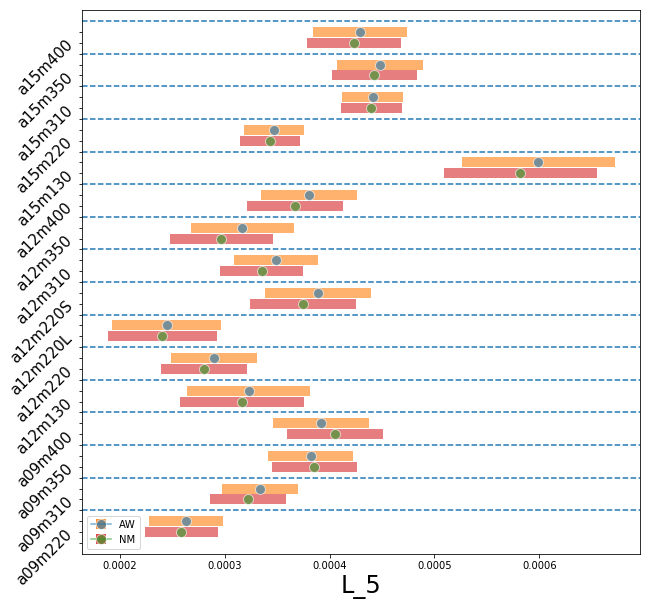

In [80]:
def plot_comparison(L5_by_ensemble, fit_type):
    y = 1
    labels = np.array([])
    for abbr in sorted(L5_by_ensemble['nm'][fit_type].keys()):
        # NM
        x = gv.mean(L5_by_ensemble['nm'][fit_type][abbr])
        xerr = gv.sdev(L5_by_ensemble['nm'][fit_type][abbr])
        plt.errorbar(x=x, y=y, xerr=xerr, yerr=0.0,
                     color='C2', marker='o', capsize=0.0, mec='white', ms=10.0, alpha=0.6,
                     ecolor='C3', elinewidth=10.0, label='NM')
        y = y + 1

        # AW
        x = gv.mean(L5_by_ensemble['aw'][fit_type][abbr])

        plt.errorbar(x=x, y=y, xerr=xerr, yerr=0.0,
                     color='C0', marker='o', capsize=0.0, mec='white', ms=10.0, alpha=0.6,
                     ecolor='C1', elinewidth=10.0, label='AW')
        labels = np.append(labels, str(""))
        y = y + 1

        labels = np.append(labels, str(abbr))
        plt.axhline(y, ls='--')

        y = y + 1
        labels = np.append(labels, str(""))

    plt.yticks(1*range(len(labels)), labels, fontsize=15, rotation=45)
    plt.ylim(-1, y)
    plt.xlabel('L_5', fontsize = 24)
    
    # Remove duplicate labels in legend
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(reversed(zip(labels, handles)))
    plt.legend(by_label.values(), by_label.keys())
    
    fig = plt.gcf()
    plt.close()
    return fig

plot_comparison(L5_by_ensemble, 'ma-taylor')

In [120]:
temp = bootstrapper._make_fit_data(0)
for key in sorted(temp.keys()):
    print key, '\t\t', temp[key][0]

L 		16.00000(16)
a/w0 		0.88040(30)
a2DI 		0.087(11)
lam2_chi 		0.9860(20)
mjs 		0.43463(93)
mju 		0.3061(13)
mk 		0.40457(24)
mpi 		0.23601(30)
mrs 		0.54898(74)
mru 		0.4508(12)
mss 		0.51876(16)
y 		1.1015(19)
